ISSO VAI APAGADO DEPOIS, SERÁ TUDO EM ARQUIVOS .PY

## Generating random modern planets dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geexhp.core import datavis, datagen, geostages
datavis.configure_matplotlib()

In [4]:
start = 0
final = 8
sample_type = "teste"
file_name = f"{start}-{final}"

dg = datagen.DataGen(url="http://127.0.0.1:3000/api.php", config = "../geexhp/config/default_habex.config")
dg.generator(
    start=start,
    end=final,
    random_atm=False,
    verbose=True,
    file=file_name,
    molweight=geostages.molweight_modern(),
    sample_type=sample_type
)

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.
> Processing planet index: 0...
> Processing planet index: 1...
> Processing planet index: 2...
> Processing planet index: 3...
> Processing planet index: 4...
> Processing planet index: 5...
> Processing planet index: 6...
> Processing planet index: 7...
> Generation completed for range 0 to 8.
> Data successfully saved to data/teste/0-8.parquet.


In [5]:
modern = pd.read_parquet("data/teste/0-8.parquet")

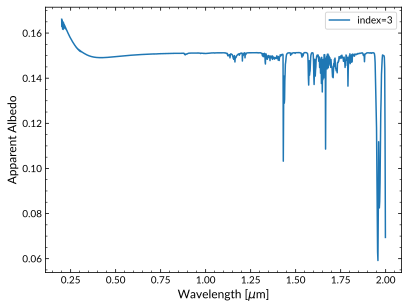

In [14]:
index = np.random.randint(0, len(modern))
datavis.plot_spectrum(modern, label=f"index={index}", index=index);

## Generating random after GOE planets dataset

In [2]:
dg_goe = datagen.DataGen(url="http://127.0.0.1:3000/api.php", stage="goe")

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [3]:
dg_goe.generator(100, random_atm=False, verbose=True, molweight=geostages.molweight_after_goe(), file="goe100")

Gererating planets::   0%|          | 0/100 [Remaining: ?, Elapsed: 00:00]

Gererating planets:: 100%|██████████| 100/100 [Remaining: 00:00, Elapsed: 25:06]

Generation completed.


In [4]:
goe = pd.read_parquet("../data/goe100.parquet")

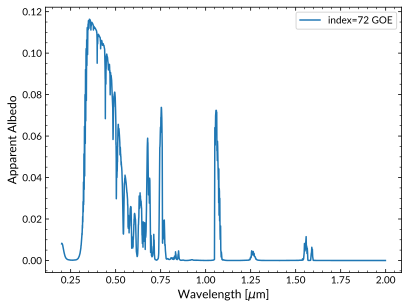

In [14]:
index = np.random.randint(0, len(goe))

_, ax = plt.subplots()
datavis.plot_spectrum(goe, label=f"index={index} GOE", index=index, ax=ax);

## Generating random planets with an isothermal profile

In [70]:
dg.generator(1_000, random_atm=True, verbose=True, file="random1k")

Gererating planets:: 100%|██████████| 1000/1000 [Remaining: 00:00, Elapsed: 3:03:26] 


Generation completed.


In [52]:
random = pd.read_parquet("../data/random1k.parquet")

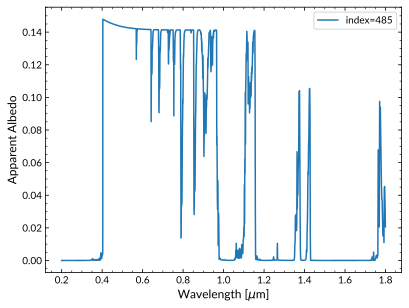

In [65]:
index = np.random.randint(0, len(random))
datavis.plot_spectrum(random, label=f"index={index}", index=index);